In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 2.1. Numpy ndarray - создание

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

* статическая типизация и гомогенность;
* возможность компиляции функций, работающих со статистически типизированными объектами;
* как следствие, эффективное использование RAM и CPU;
* broadcasting (рассмотрим далее).

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3,4], dtype=np.int16)

In [4]:
a.shape

(4,)

Shape - кортеж, который указывает число элементов в каждом измерении. 

In [5]:
a = np.array([[1, 2], [3, 4]])

In [6]:
a.size

4

In [7]:
a.shape

(2, 2)

In [8]:
a.dtype

dtype('int32')

In [9]:
a.itemsize

4

In [10]:
a.nbytes

16

При желании, можно использовать np.size(np.object) и np.shape(np.object):

In [11]:
np.size(a)

4

In [12]:
np.shape(a)

(2, 2)

При необходимости, не стоит принебрегать встроенной справкой:

In [13]:
np.array?

И специальными функциями numpy:

In [16]:
np.lookfor('create array')
#np.lookfor('binary representation') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.asarray
    Convert the input to an array.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.recarray
    Construct an ndarray that allows field access using attributes.
numpy.chararray
    chararray(shape, itemsize=1, unicode=Fa

и IPython:

In [17]:
np.con*?

Разумеется, произвольно присваивать значения элементам массива нельзя:

In [18]:
a[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

In [19]:
a[0,0] = 100

**Создание массивов**

Создавать из списков мы уже умеем:

In [20]:
np.array([1,2,3,4], dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

Разумеется, главное - чтобы объект, корый передается конструктору, поддерживал протокол итерации.

In [21]:
np.array((1,2,3,4), dtype=np.int16)

array([1, 2, 3, 4], dtype=int16)

In [22]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [23]:
np.linspace(0, 1, 25)

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

In [24]:
np.logspace(0, 10, 10)

array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])

In [25]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [24]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [28]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [26]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

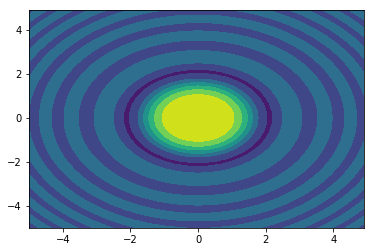

In [26]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [27]:
xx.shape

(1, 100)

In [28]:
yy.shape

(100, 1)

** Случайные массивы **

на интервале [0,1]:

In [29]:
np.random.rand(3,2)

array([[0.50755507, 0.0211933 ],
       [0.43352176, 0.44631306],
       [0.23881999, 0.83024573]])

Нормально распределенные:

In [30]:
np.random.randn(3,2)

array([[ 0.53942869,  1.52676162],
       [-3.2771929 , -1.84856065],
       [ 0.67212494, -1.49297925]])

-- N: иногда полезно получить случайное целое число:

In [31]:
np.random.randint(2,10)

6

In [45]:
# Бросьте два шестигранных кубика 100 раз и суммируйте результаты:

d1 = np.random.randint(1, 7, 100)
d2 = np.random.randint(1, 7, 100)
dsums = d1 + d2
print('d1=',d1)

d1= [1 2 4 2 5 4 4 5 6 5 4 3 5 4 6 2 4 2 5 6 1 5 2 3 6 2 6 3 2 1 6 6 5 2 6 1 4
 4 3 5 2 5 2 3 2 4 5 5 5 4 6 5 1 1 2 5 1 1 2 1 2 4 3 3 3 2 3 4 6 5 3 1 2 2
 3 6 4 2 2 3 2 2 1 6 4 6 5 4 5 2 1 6 1 4 4 4 1 4 5 1]


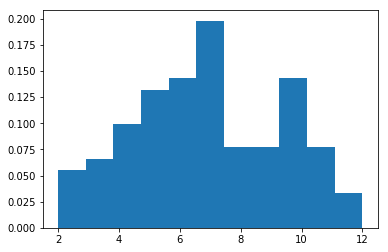

In [46]:
#Результаты представленны в виде гистограммы:
count, bins, ignored = plt.hist(dsums, 11, normed=True)
plt.show()

# 2.2. Numpy ndarray - индексы

Отдельно рассмотрим 1-мерный и многомерные массивы.

In [49]:
np.random.rand(3,)[1]

0.30217267192538855

Для одномерного массива получим сразу элемент, который находится по данному индексу. Для n-мерного массива подобная индексация вернет массив размера n-1.

In [57]:
np.random.rand(3,5,10)[1].shape

(5, 10)

In [58]:
np.random.rand(3,5)[1].shape

(5,)

Можно использовать ':' вместо индекса:

In [60]:
A = np.random.rand(3,5)

In [61]:
A

array([[0.54481275, 0.87179735, 0.58015293, 0.1781936 , 0.42526681],
       [0.80253617, 0.75425432, 0.05024556, 0.78935696, 0.17278853],
       [0.48102015, 0.83031101, 0.83389144, 0.35784007, 0.45426589]])

In [63]:
A[0,:]

array([0.54481275, 0.87179735, 0.58015293, 0.1781936 , 0.42526681])

In [64]:
A[:,0]

array([0.54481275, 0.80253617, 0.48102015])

Поддерживается стандартный протокол - python slicing syntax ([lower:upper:step]) :

In [65]:
A[0,:]

array([0.54481275, 0.87179735, 0.58015293, 0.1781936 , 0.42526681])

In [66]:
A[0,:][0:4:2]

array([0.54481275, 0.58015293])

Операция slicing создает т.н. view - то есть данные не копируются, поэтому исходный объект по адресу - mutable.

In [67]:
A[0,:][0:4:2] = [1.0, 2.5]

In [68]:
A

array([[1.        , 0.87179735, 2.5       , 0.1781936 , 0.42526681],
       [0.80253617, 0.75425432, 0.05024556, 0.78935696, 0.17278853],
       [0.48102015, 0.83031101, 0.83389144, 0.35784007, 0.45426589]])

Параметры для slicing могут пропускаться:

In [69]:
A[0,:][0:4:2]

array([1. , 2.5])

In [70]:
A[0,:][0:4]

array([1.        , 0.87179735, 2.5       , 0.1781936 ])

In [62]:
A[0,:][:3]

array([1.        , 0.81913345, 2.5       ])

In [63]:
A[0,:][::-1]

array([0.73842252, 0.71505249, 2.5       , 0.81913345, 1.        ])

In [64]:
A[0,:][-3:]

array([2.5       , 0.71505249, 0.73842252])

** Fancy Indexing **

Этим термином обозначается индексирование с помощью массивов (или иных итерируемых конструкций).

In [72]:
A

array([[1.        , 0.87179735, 2.5       , 0.1781936 , 0.42526681],
       [0.80253617, 0.75425432, 0.05024556, 0.78935696, 0.17278853],
       [0.48102015, 0.83031101, 0.83389144, 0.35784007, 0.45426589]])

In [73]:
row_indices = [1, 2]
A[row_indices]

array([[0.80253617, 0.75425432, 0.05024556, 0.78935696, 0.17278853],
       [0.48102015, 0.83031101, 0.83389144, 0.35784007, 0.45426589]])

In [74]:
col_indices = [1, -1]
A[row_indices, col_indices]

array([0.75425432, 0.45426589])

Возможно Булево индексирование (**Boolean indexing**):

In [77]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [78]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [72]:
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

Это очень удобно, как вы наверняка догадались, если мы хотим отобрать данные, отвечающие определенным условиям:

In [79]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [80]:
mask = (5 < x) * (x < 7.5)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [81]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

Получить список индексов элементов, отвечающих заданной маске, можно с помощью **which**:

In [82]:
indices = np.where(mask)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [83]:
x[indices]

array([5.5, 6. , 6.5, 7. ])

**take** еще одна конструкция выбора элементов массива:

In [84]:
v = np.arange(-3,3)
row_indices = [1, 3, 5]

In [85]:
v[row_indices]

array([-2,  0,  2])

In [81]:
v.take(row_indices)

array([-2,  0,  2])

In [86]:
np.take(v, row_indices)

array([-2,  0,  2])

** choices ** - полезная функция для выбора элеметов из нескольких массивов:

In [87]:
which = [1, 0, 1, 0]
choices = [[-1,-2,-3,-4], [1,2,3,4]]
np.choose(which, choices)

array([ 1, -2,  3, -4])

** compress ** - альтернативой Булевому индексированию:

In [88]:
a = np.array([[1, 2], [3, 4], [5, 6]])
np.compress([False, True, True], a, axis=0)

array([[3, 4],
       [5, 6]])

## TLDR:
* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

# 2.3. Numpy ndarray - элементарные операции с массивами

** Broadcasting **

Концепеция broadcasting является ключевой для понимания операций с массивами. Обычно, операции с массивами производятся поэлементно. 

In [89]:
a = np.array([1.0,2.0,3.0])
b = np.array([2.0,2.0,2.0])

In [90]:
a * b

array([2., 4., 6.])

Что, если массивы разного размера? Начнем с простого - скаляр и вектор:

In [91]:
a = np.array([1.0,2.0,3.0])
b = 2.0
a * b

array([2., 4., 6.])

Все просто - скаляр словно "вырастает" (broadcasted) до размеров вектора и производится поэлементная операция (разумеется, это умозрительная аналогия - новый вектор из 2 не создается!).

Общее правило таково:

операция может произведена если размерность "крайних" осей массивов совпадает (trailing dimension), либо один из элементов является скаляром.

Пример из официальной документации:

In [68]:
'''

Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

'''
pass

а вот эти операции дадут вам ошибку:

In [69]:
'''
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
'''
pass

In [92]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

print (x.shape)

print (y.shape)

x + y

(4,)
(5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [93]:
print (xx.shape)
print (y.shape)
print ((xx + y).shape)
print (xx + y)

print ('-------')

print (x.shape)
print (z.shape)
print ((x + z).shape)
print (x + z)

(4, 1)
(5,)
(4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
-------
(4,)
(3, 4)
(3, 4)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Пример из официальной документации:

In [94]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [100]:
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [101]:
a[:, np.newaxis].shape

(4, 1)

** Операции вида "массив - скаляр" **

In [99]:
A

array([[1.        , 0.87179735, 2.5       , 0.1781936 , 0.42526681],
       [0.80253617, 0.75425432, 0.05024556, 0.78935696, 0.17278853],
       [0.48102015, 0.83031101, 0.83389144, 0.35784007, 0.45426589]])

In [100]:
A + 2

array([[3.        , 2.87179735, 4.5       , 2.1781936 , 2.42526681],
       [2.80253617, 2.75425432, 2.05024556, 2.78935696, 2.17278853],
       [2.48102015, 2.83031101, 2.83389144, 2.35784007, 2.45426589]])

** Операции вида "массив - массив" **

Производятся поэлементно с учетом правил broadcasting:

In [101]:
A * A

array([[1.00000000e+00, 7.60030621e-01, 6.25000000e+00, 3.17529601e-02,
        1.80851860e-01],
       [6.44064307e-01, 5.68899579e-01, 2.52461603e-03, 6.23084412e-01,
        2.98558769e-02],
       [2.31380385e-01, 6.89416368e-01, 6.95374933e-01, 1.28049515e-01,
        2.06357503e-01]])

In [102]:
A / A

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

** Матричные операции**

In [106]:
A = np.random.rand(3,3)
A

array([[0.33311848, 0.95609961, 0.0433334 ],
       [0.29136128, 0.60744002, 0.28339931],
       [0.72664199, 0.83169399, 0.71211843]])

In [107]:
np.dot(A,A)

array([[0.4210262 , 0.93530774, 0.31625164],
       [0.47997216, 0.88325528, 0.38658762],
       [1.00183645, 1.79221095, 0.77430203]])

In [108]:
v = np.random.randn(3)
v

array([ 0.13835051, -2.09664828,  0.35493321])

In [109]:
np.dot(A,v)

array([-1.94313702, -1.13269026, -1.390484  ])

In [110]:
np.dot(v,v)

4.541052470907029

Если хочется использовать по умолчанию операции из матричной алгебры, то можно использовать конструктор matrix().

In [111]:
M = np.matrix(A)

In [112]:
v1 = np.matrix(v).T

In [113]:
M.shape

(3, 3)

In [115]:
v1.shape

(3, 1)

In [116]:
v1.T * v1

matrix([[4.54105247]])

In [117]:
M * v1

matrix([[-1.94313702],
        [-1.13269026],
        [-1.390484  ]])

** Преобразование массивов**

In [125]:
A.T

array([[0.26298048, 0.14280278, 0.49992016],
       [0.09889671, 0.80566579, 0.91425194],
       [0.79884636, 0.8795261 , 0.41241259]])

In [126]:
C = np.matrix([[1j, 2j], [3j, 4j]])

In [127]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово сопряжение:

In [128]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

In [129]:
np.real(C)

matrix([[0., 0.],
        [0., 0.]])

In [130]:
np.imag(C)

matrix([[1., 2.],
        [3., 4.]])

** reshape **

In [118]:
a

array([ 0., 10., 20., 30.])

In [120]:
a = a.reshape((2, 2))
a

array([[ 0., 10.],
       [20., 30.]])

** resize **

In [122]:
a = np.arange(4)

In [123]:
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

** repeat **

In [124]:
a = np.array([[1, 2], [3, 4]])
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [125]:
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

** concatenate **

In [126]:
a

array([[1, 2],
       [3, 4]])

In [127]:
b = np.array([[5, 6]])

In [130]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [131]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Что касается параметра axis, то иллюстрировать его использование можно следующим образом:

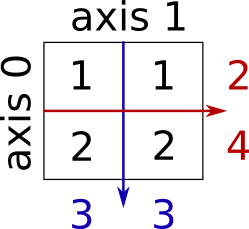

In [132]:
from IPython.display import Image
Image(filename='axis.png')

** hstack **

Название говорит само за себя - horizontal stack.

In [144]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

In [145]:
a.shape

(2, 2)

In [146]:
b.T.shape

(2, 1)

** vstack **

In [147]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [148]:
a.shape

(2, 2)

In [149]:
b.shape

(1, 2)

** Копии и view **

Мы помним, что очень важно различать копирование объекта и присваивание новой ссылки на объект. Numpy в этом смысле не отличается от списков:

In [133]:
A = np.array([[1, 2], [3, 4]])

In [134]:
B = A

In [135]:
B[0,0] = 10

In [136]:
A

array([[10,  2],
       [ 3,  4]])

Если это не тот тип поведения, который нам нужен - следует использовать np.copy():

In [137]:
B = np.copy(A)

In [138]:
B[0,0] = 100

In [139]:
A

array([[10,  2],
       [ 3,  4]])

Важно помнить, что если вы используете view массива, то копии вы не создаете!

In [140]:
a = np.arange(10)

In [141]:
b = a[::2]

In [144]:
np.may_share_memory(a, b)

True

In [145]:
c = a[::2].copy()
np.may_share_memory(a, c)

False

In [146]:
d = a.T
np.may_share_memory(a, d)

True

Как следствие - никогда не делайте так:

In [147]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [148]:
a += a.T

In [149]:
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

## TLDR:
* следует отличать копию массива и view;
* при осуществлении операций помните про правила broadcasting;
* запомните hstack и vstack.

# 2.4. Numpy - основные функции.

** Встроенные функции массива **

In [150]:
m = np.random.rand(3,3)

In [151]:
m.sum()

4.290026506080916

In [152]:
m.max()

0.8167722462257901

** Всегда используйте встроенные функции! **

In [165]:
a = np.random.rand(10000)

In [166]:
%timeit -n 100 max(a)

1.89 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [167]:
%timeit -n 100 a.max()

15.7 µs ± 3.24 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [168]:
%timeit -n 100 sum(a)

3.07 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [170]:
%timeit -n 100 a.sum()

19 µs ± 3.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Просто считать сумму элементов матрицы или находить максимальный элемент не так интересно, и тут нам помогают axis:

In [171]:
m

array([[0.25749113, 0.66037436, 0.64958214],
       [0.44968527, 0.81677225, 0.18042144],
       [0.47944384, 0.33358761, 0.46266847]])

In [172]:
m.sum(axis=0)

array([1.18662025, 1.81073421, 1.29267205])

In [173]:
m.sum(axis=1)

array([1.56744763, 1.44687896, 1.27569992])

In [145]:
m.max(axis=0)

array([ 0.80017464,  0.50831188,  0.62732854])

Очень полезно произведение всех элементов:

In [174]:
m.prod(axis=1)

array([0.1104553 , 0.06626707, 0.07399759])

Кумулятивная сумма элементов:

In [175]:
a.cumsum() * 100

array([4.90417914e+01, 1.44683626e+02, 1.47853764e+02, ...,
       4.96228515e+05, 4.96275203e+05, 4.96277035e+05])

Кумулятивное произведение:

In [176]:
a.cumprod()

array([0.49041791, 0.46904469, 0.01486936, ..., 0.        , 0.        ,
       0.        ])

**Простые статистики**

**Среднее**

In [177]:
m.mean(axis=0)

array([0.39554008, 0.60357807, 0.43089068])

In [178]:
np.mean(m, axis=0)

array([0.39554008, 0.60357807, 0.43089068])

In [179]:
np.mean(a)

0.4962770345021717

In [180]:
a.mean()

0.4962770345021717

**Медиана**

In [153]:
np.median(m, axis=0)

array([ 0.49251674,  0.49433532,  0.23975588])

In [154]:
np.median(a)

0.49990770202468521

** Дисперсия **

In [181]:
np.std(m, axis=0)

array([0.09836845, 0.20130609, 0.19284763])

In [182]:
m.std(axis=0)

array([0.09836845, 0.20130609, 0.19284763])

In [183]:
np.var(a)

0.08401578694527752

In [184]:
a.var()

0.08401578694527752

** Сортировка **

In [185]:
np.sort(a)

array([7.10043753e-05, 3.08754991e-04, 3.52733684e-04, ...,
       9.99611255e-01, 9.99620365e-01, 9.99823997e-01])

Функция выше возвращает отсортированную копию массива. Если нужна сортировка in-place:

In [186]:
a.sort()

In [187]:
a = np.random.rand(100000)

Также иногда бывает полезно получить только список индексов в правильном порядке:

In [188]:
np.argsort(a)

array([98420, 47979, 41039, ..., 24483, 57329,  2388], dtype=int64)

In [189]:
np.argmax(a)

2388

In [191]:
np.argmin(a)

98420

In [190]:
np.nonzero(a)

(array([    0,     1,     2, ..., 99997, 99998, 99999], dtype=int64),)

** Функции для работы с матрицами **

In [192]:
m

array([[0.25749113, 0.66037436, 0.64958214],
       [0.44968527, 0.81677225, 0.18042144],
       [0.47944384, 0.33358761, 0.46266847]])

In [193]:
np.diag(m)

array([0.25749113, 0.81677225, 0.46266847])

In [194]:
m.diagonal()

array([0.25749113, 0.81677225, 0.46266847])

Для целого класса функций из линейной алгебры есть свой суб-модуль np.linalg.

http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

In [195]:
MM = np.random.randn(9, 6)

In [196]:
U, s, V = np.linalg.svd(MM, full_matrices=False)
U.shape, V.shape, s.shape

((9, 6), (6, 6), (6,))

In [197]:
S = np.diag(s)
np.allclose(MM, np.dot(U, np.dot(S, V)))

True

** Векторизация кода **

В numpy есть встроенная функция vectorize, которая "автоматически" векторизует вашу функцию:

In [207]:
def heavyside(x):
    if x >= 0:
        return 1
    else:
        return 0


In [210]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [211]:
heavyside_vec = np.vectorize(heavyside)

In [212]:
heavyside_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

Тем не менее, лучше сразу пишите так:

In [214]:
def heavyside(x):
    return 1 * (x >= 0)

In [215]:
heavyside(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [216]:
np.array([-3,-2,-1,0,1,2,3]) >= 0

array([False, False, False,  True,  True,  True,  True])

In [217]:
1 * (np.array([-3,-2,-1,0,1,2,3]) >= 0)

array([0, 0, 0, 1, 1, 1, 1])

** Условные выражения **

Как вы уже поняли, для вектора конструкция типа if (vector) не подходит.

In [220]:
M

matrix([[0.33311848, 0.95609961, 0.0433334 ],
        [0.29136128, 0.60744002, 0.28339931],
        [0.72664199, 0.83169399, 0.71211843]])

In [221]:


if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

no element in M is larger than 5


In [222]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## TLDR:
- всегда используйте встроенные в np функции;
- векторизуйте везде, где это возможно!

# 2.5. Numpy - I/O.

В данном случае у нас на выбор 2 опции - либо формат numpy, либо просто текстовый файл.

In [233]:
np.save("random.npy", M)

In [234]:
np.load("random.npy")

array([[0.33311848, 0.95609961, 0.0433334 ],
       [0.29136128, 0.60744002, 0.28339931],
       [0.72664199, 0.83169399, 0.71211843]])

In [231]:
np.savetxt('random.csv', M, delimiter='\t')

In [232]:
np.loadtxt('random.csv')

array([[0.33311848, 0.95609961, 0.0433334 ],
       [0.29136128, 0.60744002, 0.28339931],
       [0.72664199, 0.83169399, 0.71211843]])